In [199]:
import numpy as np
import matplotlib.pyplot as plt
from pymaze import maze, agent
import pandas as pd

#path = steps = np.random.normal(size=(3600, 2))
# Path generate
path = []
data= pd.read_csv("test1.csv")
data


,Key,Time,Position,direction,item,phase,step,score
0,2,13.03920,Maze Cell 0 2,West,NaN,1,1,0
1,4,13.44297,Maze Cell 0 2,West,NaN,1,1,0
2,1,13.78292,Maze Cell 0 1,South,NaN,1,1,0
3,4,14.14306,Maze Cell 0 1,South,NaN,1,1,0
4,1,14.47490,Maze Cell 1 1,East,NaN,1,1,0
...,...,...,...,...,...,...,...,...
344,1,161.83090,Maze Cell 3 3,East,NaN,3,3,8
345,4,162.16290,Maze Cell 3 3,East,NaN,3,3,8
346,2,162.49080,Maze Cell 3 4,South,NaN,3,3,8
347,4,163.09070,Maze Cell 3 4,South,NaN,3,3,8


In [200]:
phase=set()
for index, row in data.iterrows():
    tempt=[]
    tempt.append(row['phase'])
    tempt.append(row['step'])
    tempt=tuple(tempt)
    phase.add(tempt)
phase=list(phase)
print(phase)
phase_sort=sorted(phase, key=lambda element: (element[0], element[1]))
print(phase_sort)

[(2, 4), (1, 2), (2, 1), (1, 5), (3, 1), (1, 1), (1, 4), (2, 3), (3, 3), (2, 2), (3, 2), (2, 5), (1, 3)]
[(1, 1), (1, 2), (1, 3), (1, 4), (1, 5), (2, 1), (2, 2), (2, 3), (2, 4), (2, 5), (3, 1), (3, 2), (3, 3)]


In [201]:
list_time=[]
list_steps=[]
for idx, stage in enumerate(phase_sort):
    df1 = data[(data['phase'] == stage[0]) & (data['step'] == stage[1] ) ]
    total_time=float(df1.iloc[[df1.shape[0]-1]]['Time'])-float(df1.iloc[[0]]['Time'])
    list_time.append(total_time)
    list_steps.append(df1.shape[0])
    stage=str(stage)
data2 = {'Stage': phase_sort,
        'Steps': list_steps, 'Total_Times': list_time}
df2 = pd.DataFrame(data2)   
print(df2)
print (df2.describe()) 
    

     Stage  Steps  Total_Times
0   (1, 1)     38     13.63663
1   (1, 2)     36     13.34378
2   (1, 3)     40     13.99211
3   (1, 4)     39     14.58796
4   (1, 5)     58     27.44100
5   (2, 1)     10      2.99660
6   (2, 2)      8      2.08340
7   (2, 3)     10      2.91230
8   (2, 4)     10      3.25170
9   (2, 5)      8      1.95200
10  (3, 1)     38     19.63630
11  (3, 2)     27      9.87680
12  (3, 3)     27     10.06830
           Steps  Total_Times
count  13.000000    13.000000
mean   26.846154    10.444529
std    16.293384     7.789713
min     8.000000     1.952000
25%    10.000000     2.996600
50%    27.000000    10.068300
75%    38.000000    13.992110
max    58.000000    27.441000


AxesSubplot(0.125,0.11;0.775x0.77)
AxesSubplot(0.125,0.11;0.775x0.77)
AxesSubplot(0.125,0.11;0.775x0.77)


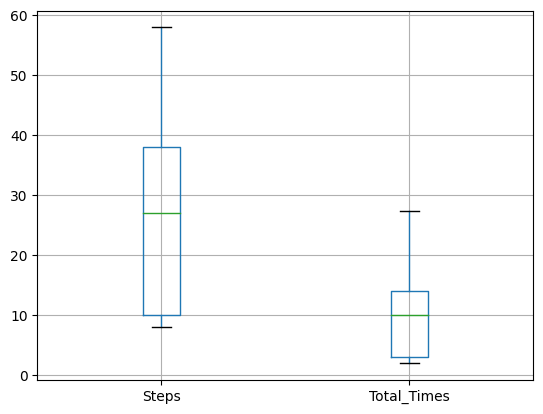

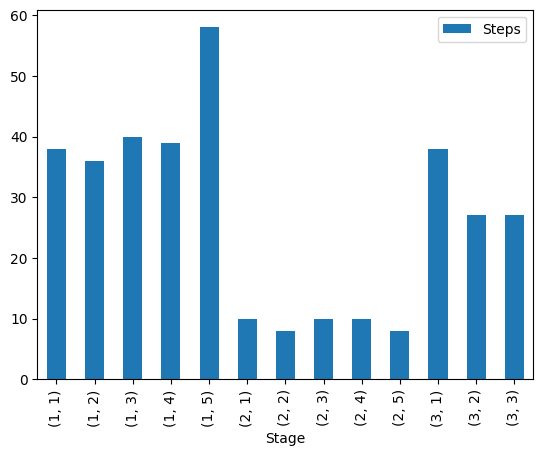

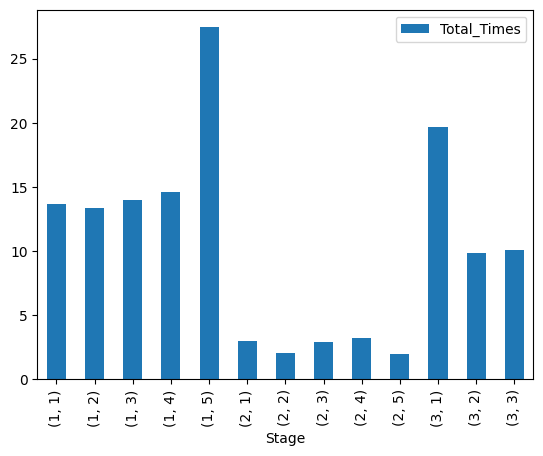

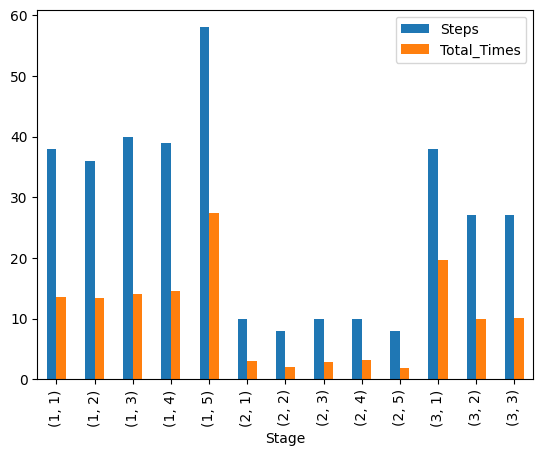

In [202]:

print(df2.boxplot(column=['Steps','Total_Times']))
# print(df2.plot.bar(x='Stage',y='Steps',rot=0))

print(df2.sort_values(by='Stage',ascending=True).plot.bar(x='Stage',y='Steps',rot=0))
plt.xticks(rotation=90)

print(df2.sort_values(by='Stage',ascending=True).plot.bar(x='Stage',y='Total_Times',rot=0))
plt.xticks(rotation=90)
# print(df2.plot.bar(x='Stage',y='Total_Times',rot=0))
# print(df2.plot.bar(x='Stage',rot=0))

df2.sort_values(by='Stage',ascending=True).plot.bar(x='Stage',rot=0)
plt.xticks(rotation=90)
plt.show() 

In [203]:
mask = df2.Stage.apply(lambda x: x[0]==1)
df_1 = df2[mask]
# print(df_1)
mask = df2.Stage.apply(lambda x: x[0]==3)
df_2 = df2[mask]
# print(df_2)

stage=[1,3]
steps=[]
times=[]
step1=df_1["Steps"].mean()
step2=df_2["Steps"].mean()
time1=df_1["Total_Times"].mean()
time2=df_2["Total_Times"].mean()
steps.append(step1)
steps.append(step2)
times.append(time1)
times.append(time2)
data3 = {'Stage': stage,
        'Steps': steps, 'Total_Times': times}
df3 = pd.DataFrame(data3)  
df3



,Stage,Steps,Total_Times
0,1,42.200000,16.600296
1,3,30.666667,13.193800


AxesSubplot(0.125,0.11;0.775x0.77)
AxesSubplot(0.125,0.11;0.775x0.77)
AxesSubplot(0.125,0.11;0.775x0.77)
AxesSubplot(0.125,0.11;0.775x0.77)


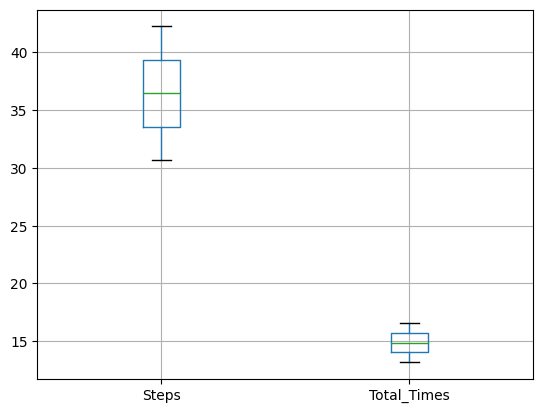

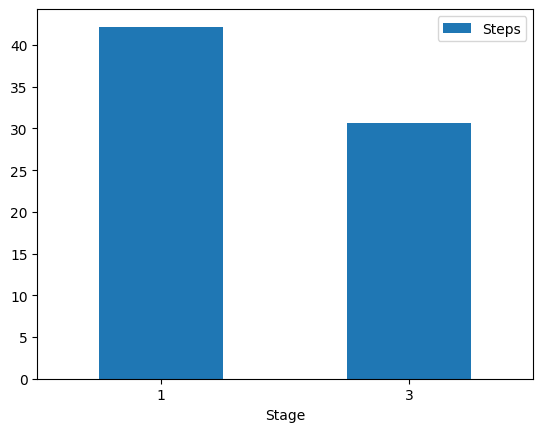

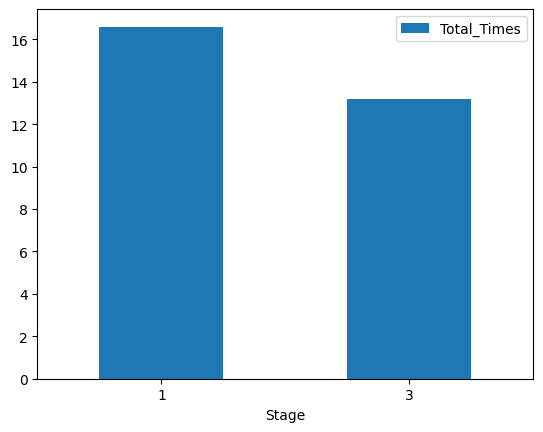

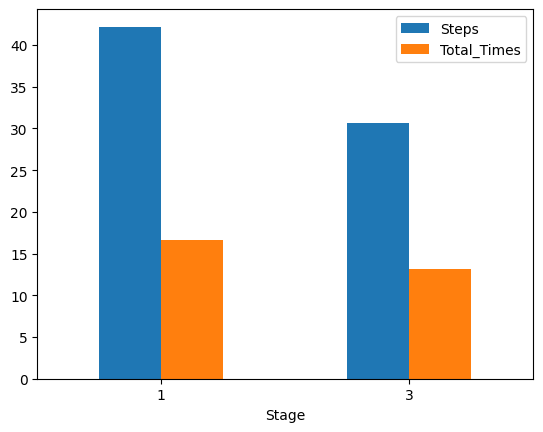

In [204]:
print(df3.boxplot(column=['Steps','Total_Times']))
print(df3.plot.bar(x='Stage',y='Steps',rot=0))
print(df3.plot.bar(x='Stage',y='Total_Times',rot=0))
print(df3.plot.bar(x='Stage',rot=0))
plt.show() 

In [205]:
df3=df2
df3['Steps']=(df3['Steps']-df3['Steps'].min()) / (df3['Steps'].max() - df3['Steps'].min())
df3['Total_Times']=(df3['Total_Times']-df3['Total_Times'].min()) / (df3['Total_Times'].max() - df3['Total_Times'].min())
print(df3)


     Stage  Steps  Total_Times
0   (1, 1)   0.60     0.458419
1   (1, 2)   0.56     0.446929
2   (1, 3)   0.64     0.472365
3   (1, 4)   0.62     0.495742
4   (1, 5)   1.00     1.000000
5   (2, 1)   0.04     0.040982
6   (2, 2)   0.00     0.005155
7   (2, 3)   0.04     0.037675
8   (2, 4)   0.04     0.050991
9   (2, 5)   0.00     0.000000
10  (3, 1)   0.60     0.693801
11  (3, 2)   0.38     0.310911
12  (3, 3)   0.38     0.318424


In [206]:
mask = df3.Stage.apply(lambda x: x[0]==1)
df2_1 = df3[mask]
# print(df_1)
mask = df3.Stage.apply(lambda x: x[0]==3)
df2_2 = df3[mask]
# print(df_2)

stage=[1,3]
steps=[]
times=[]
step1=df2_1["Steps"].mean()
step2=df2_2["Steps"].mean()
time1=df2_1["Total_Times"].mean()
time2=df2_2["Total_Times"].mean()
steps.append(step1)
steps.append(step2)
times.append(time1)
times.append(time2)
data3 = {'Stage': stage,
        'Steps': steps, 'Total_Times': times}
df4 = pd.DataFrame(data3)  
df4

,Stage,Steps,Total_Times
0,1,0.684000,0.574691
1,3,0.453333,0.441045


In [207]:

sum_1=0
sum_3=0
for i in df3['Stage']:
    if(str(i)[1]=='1'):
        sum_1+=1
    elif(str(i)[1]=='3'):
        sum_3+=1
print(sum_1)
print(sum_3)

df4['Steps'].iloc[:1]=df4['Steps'].iloc[:1]*sum_1
df4['Total_Times'].iloc[:1]=df4['Total_Times'].iloc[:1]*sum_1
df4['Steps'].iloc[1]=df4['Steps'].iloc[1]*sum_3
df4['Total_Times'].iloc[1]=df4['Total_Times'].iloc[1]*sum_3

df4


      




5
3


/var/folders/b_/c85l8q8j3lg081sxnvtgnnkm0000gn/T/ipykernel_16405/3610861663.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4['Steps'].iloc[:1]=df4['Steps'].iloc[:1]*sum_1
/var/folders/b_/c85l8q8j3lg081sxnvtgnnkm0000gn/T/ipykernel_16405/3610861663.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4['Total_Times'].iloc[:1]=df4['Total_Times'].iloc[:1]*sum_1
/var/folders/b_/c85l8q8j3lg081sxnvtgnnkm0000gn/T/ipykernel_16405/3610861663.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stabl

,Stage,Steps,Total_Times
0,1,3.42,2.873454
1,3,1.36,1.323135


AxesSubplot(0.125,0.11;0.775x0.77)
AxesSubplot(0.125,0.11;0.775x0.77)
AxesSubplot(0.125,0.11;0.775x0.77)
AxesSubplot(0.125,0.11;0.775x0.77)


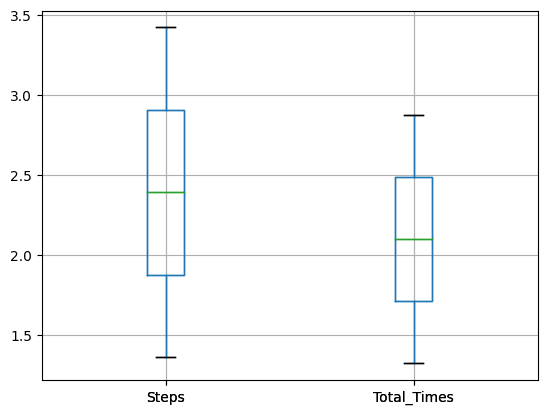

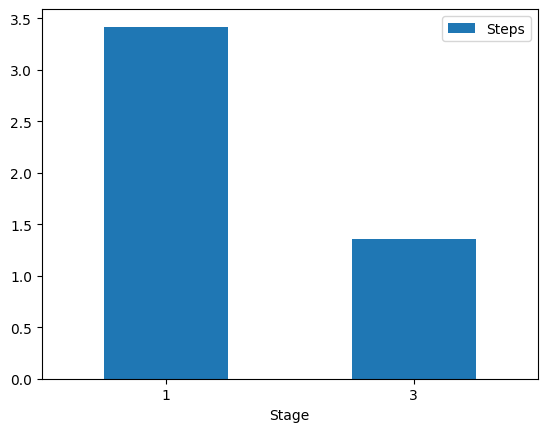

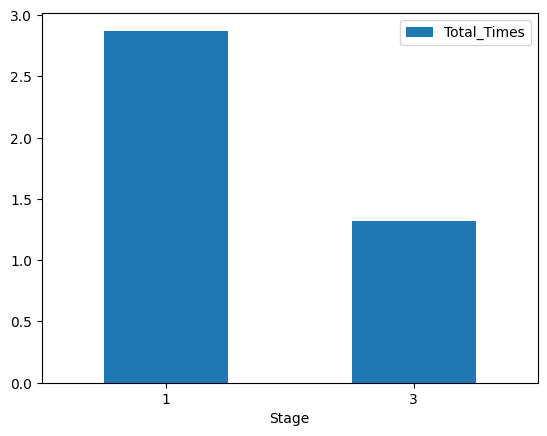

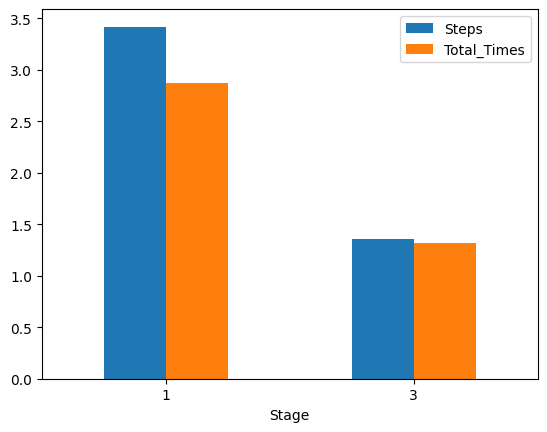

In [211]:
print(df4.boxplot(column=['Steps','Total_Times']))
print(df4.plot.bar(x='Stage',y='Steps',rot=0))
print(df4.plot.bar(x='Stage',y='Total_Times',rot=0))
print(df4.plot.bar(x='Stage',rot=0))
plt.show() 

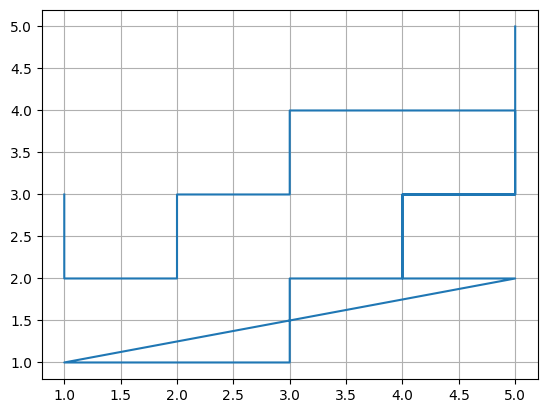

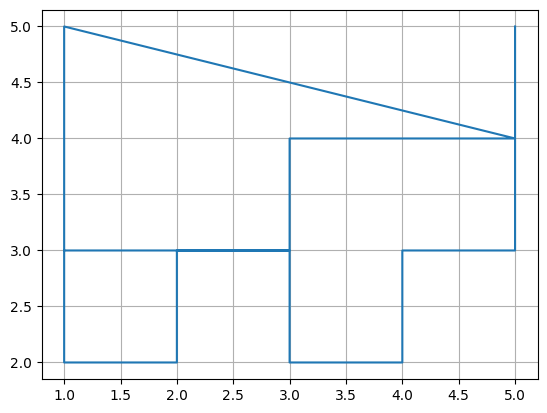

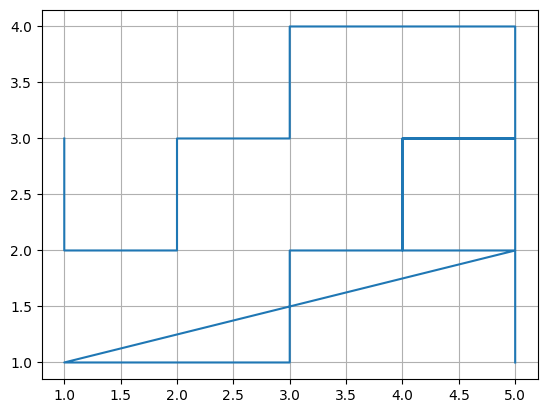

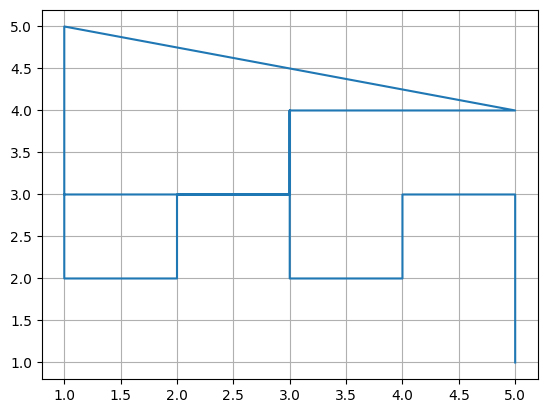

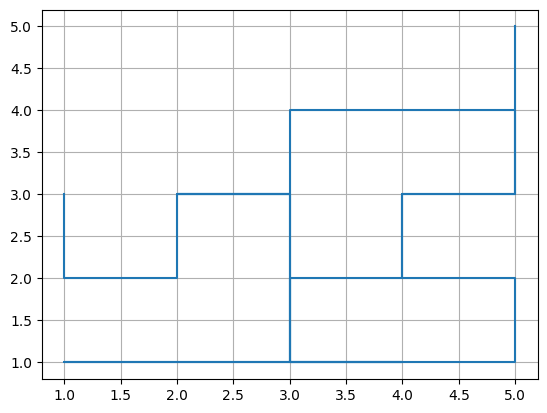

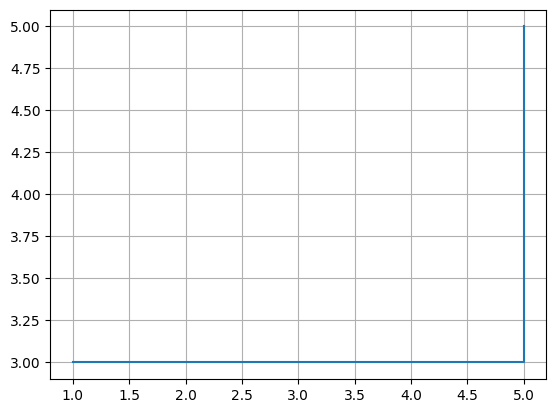

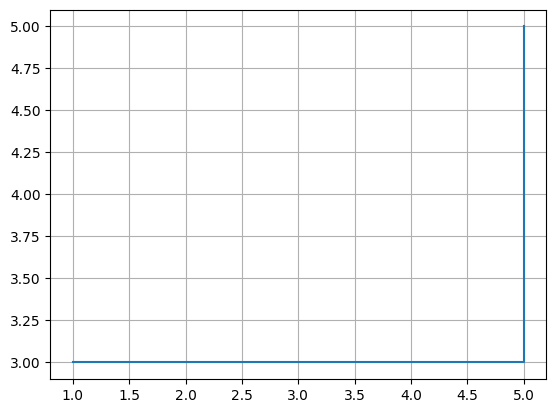

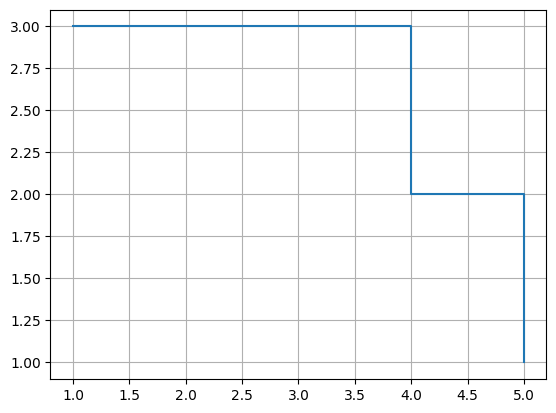

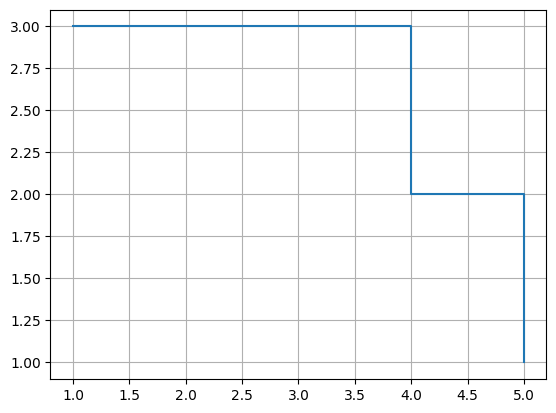

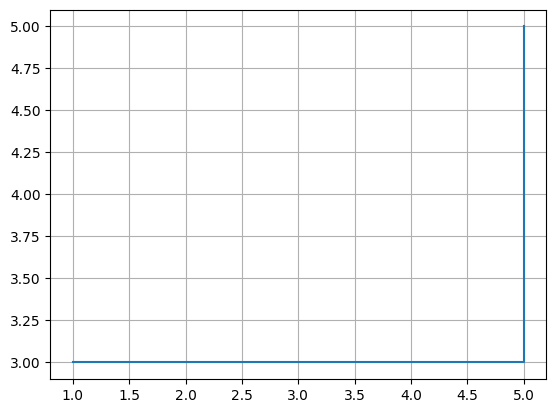

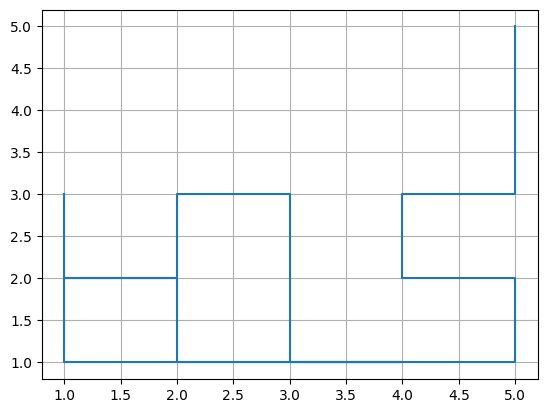

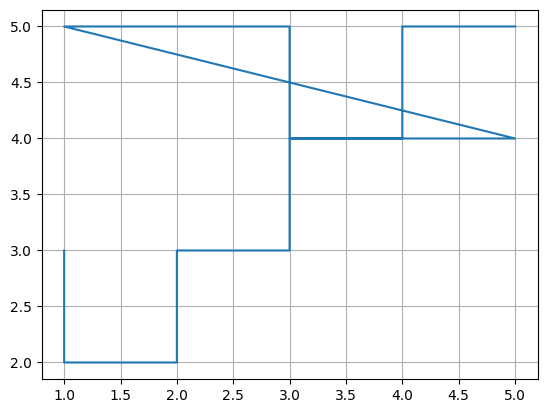

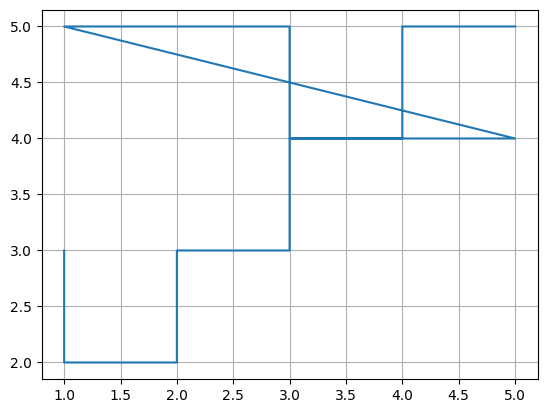

In [193]:

for idx, stage in enumerate(phase_sort):
    path = []
    df1 = data[(data['phase'] == stage[0]) & (data['step'] == stage[1] ) ]
    for index, row in df1.iterrows():
        tup1 = []
        if ('Maze' in row["Position"]):
            tup1.append(int(row["Position"].split()[2])+1)
            tup1.append(int(row["Position"].split()[3])+1)
            path.append(tuple(tup1))
    path = np.array(path)
    plt.grid(True)
    plt.plot(*path.T)
    plt.show()
        
